# Week 9 Instructor Lab: Descriptive Statistics

**Author**: Brady Woods  
**Course**: BGEN632 Grad. Intro. to Python  
**Term**: Spring 2025  
**Date**: April 28, 2025  

This notebook contains code completing the week nine instructor lab.

## Imports

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import pearsonr, shapiro
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

#### Setting Directory

In [2]:
os.chdir("/Users/bradywoods/Desktop/week9labs/data")
os.getcwd() 

'/Users/bradywoods/Desktop/week9labs/data'

#### Reading in Data

In [3]:
hospital_df = pd.read_csv("CaliforniaHospitalData.csv")
personnel_df = pd.read_csv("CaliforniaHospitalData_Personnel.txt", sep="\t")

In [4]:
hospital_df.head(2)

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,34916220.47,49933713,-5505933,15
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,20348596.22,53351748,-444391,99


In [5]:
personnel_df.head(2)

,HospitalID,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
0,35665,351131,Cherukuri,Dileep,M,4,Safety Inspection Member,23987,2,1/1/2019,405-564-5580,dileep.cherukuri@okstate.edu
1,12145,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009,405-744-2238,jose.rodriguez@edihealth.com


#### Merging & Cleaning

In [6]:
merge_df = pd.merge(personnel_df, hospital_df, on="HospitalID", how="left")

merge_df = merge_df.drop(columns=["Work_ID", "PositionID", "Website"])

In [7]:
new_record = {
    "HospitalID": merge_df["HospitalID"].iloc[0],
    "LastName": "Woods",
    "FirstName": "Brady",
    "Gender": "M",
    "PositionTitle": "Information Team Lead",
    "Compensation": 60000,
    "MaxTerm": 4,
    "StartDate": pd.to_datetime("04/28/2025").date(),
    "Name": merge_df["Name"].iloc[0],
    "Zip": merge_df["Zip"].iloc[0],
    "TypeControl": merge_df["TypeControl"].iloc[0],
    "Teaching": merge_df["Teaching"].iloc[0],
    "DonorType": merge_df["DonorType"].iloc[0],
    "NoFTE": merge_df["NoFTE"].iloc[0],
    "NetPatRev": merge_df["NetPatRev"].iloc[0],
    "InOperExp": merge_df["InOperExp"].iloc[0],
    "OutOperExp": merge_df["OutOperExp"].iloc[0],
    "OperRev": merge_df["OperRev"].iloc[0],
    "OperInc": merge_df["OperInc"].iloc[0],
    "AvlBeds": merge_df["AvlBeds"].iloc[0]
}

merge_df = pd.concat([merge_df, pd.DataFrame([new_record])], ignore_index=True)

In [8]:
merge_df["StartDate"] = pd.to_datetime(merge_df["StartDate"])

In [9]:
categorical_cols = ["TypeControl", "Teaching", "DonorType", "Gender"]
for col in categorical_cols:
    merge_df[col] = merge_df[col].astype("category")

In [13]:
merge_df.tail(2)

,HospitalID,LastName,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email,...,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
63,29823,Tanner,Patricia,F,Acting Director,248904,8,2009-01-01,801-687-7877,patricia.tanner@prohealth.net,...,Non Profit,Small/Rural,Charity,168.0,51726.4918,9022366.447,10402509.55,19445901.0,21025.0,48.0
64,35665,Woods,Brady,M,Information Team Lead,60000,4,2025-04-28,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Descriptive Statistics

In [14]:
numeric_cols = merge_df.select_dtypes(include=["float64", "int64"]).columns
numeric_summary = merge_df[numeric_cols].agg(["mean", "median", "min", "max"])
print("\nNumeric Summary:\n", numeric_summary)

# Text variable summary
text_cols = merge_df.select_dtypes(include=["object"]).columns
print("\nText Variable Summary:")
for col in text_cols:
    print(f"\nColumn: {col}")
    print(merge_df[col].describe())

# Categorical variable summary
print("\nCategorical Variable Summary:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(merge_df[col].value_counts())


Numeric Summary:
           HospitalID   Compensation   MaxTerm        NoFTE     NetPatRev  \
mean    32962.123077   89095.676923  4.138462  1350.264262  6.695836e+05   
median  34454.000000   46978.000000  4.000000   374.320000  1.723989e+05   
min     10767.000000   23987.000000  2.000000    55.000000  1.417224e+04   
max     81351.000000  248904.000000  8.000000  8000.000000  4.662582e+06   

           InOperExp    OutOperExp       OperRev       OperInc    AvlBeds  
mean    1.662706e+08  9.015808e+07  2.562733e+08 -1.553491e+05  194.52459  
median  3.184268e+07  3.491622e+07  6.339822e+07  1.572695e+06   99.00000  
min     1.436471e+06  3.787718e+06  5.235317e+06 -3.211633e+08   12.00000  
max     1.285631e+09  6.621559e+08  1.912179e+09  1.648724e+08  909.00000  

Text Variable Summary:

Column: LastName
count        65
unique       27
top       Smith
freq          4
Name: LastName, dtype: object

Column: FirstName
count        65
unique       23
top       David
freq          6
N

## Visualizations

#### Histograms

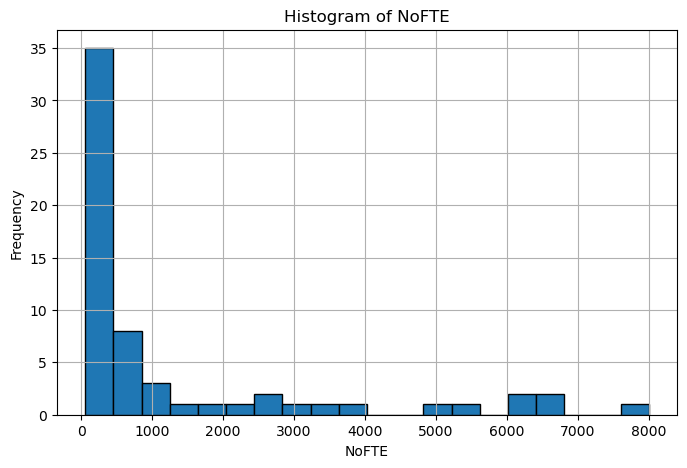

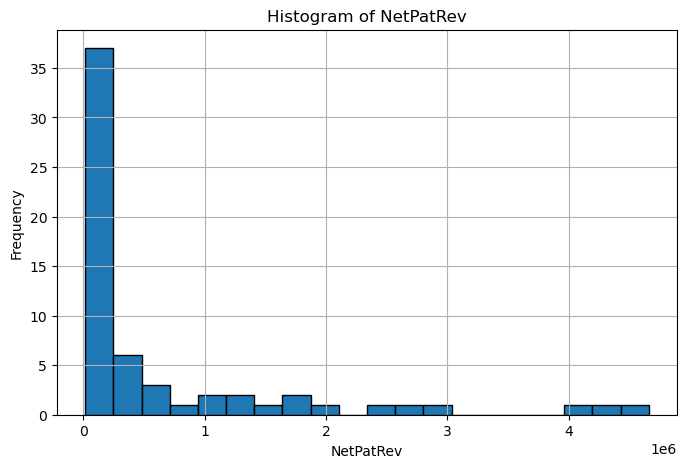

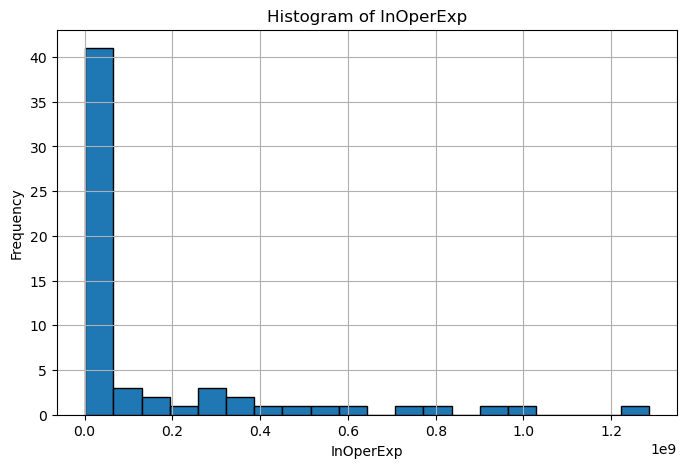

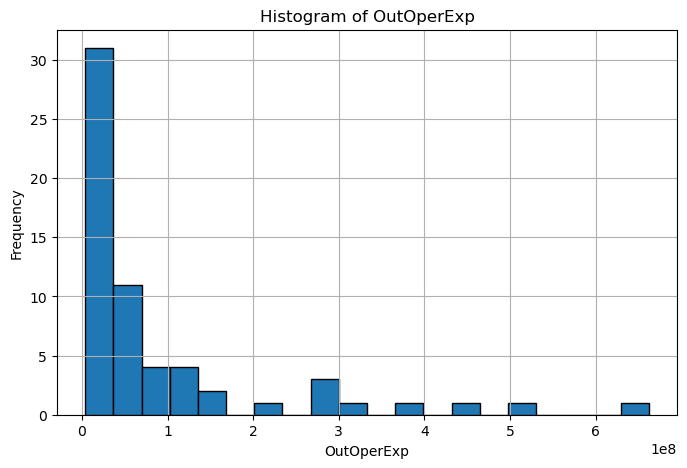

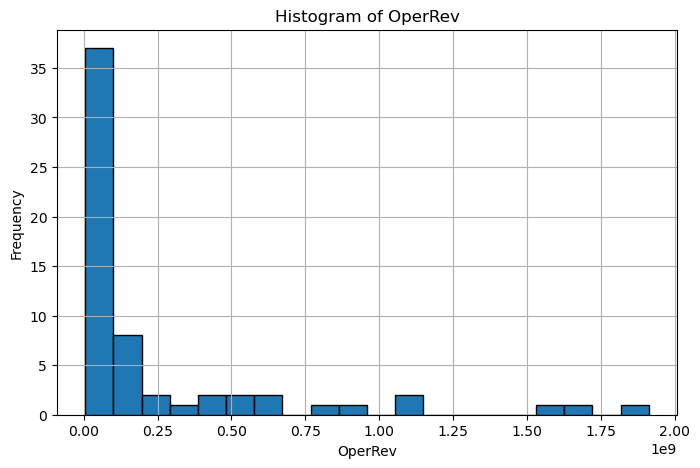

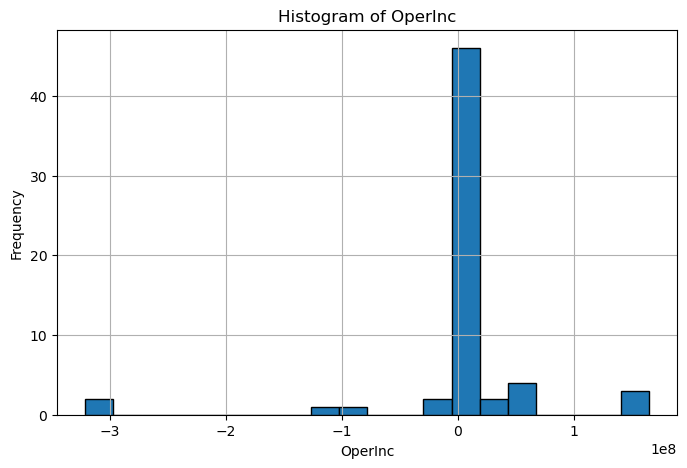

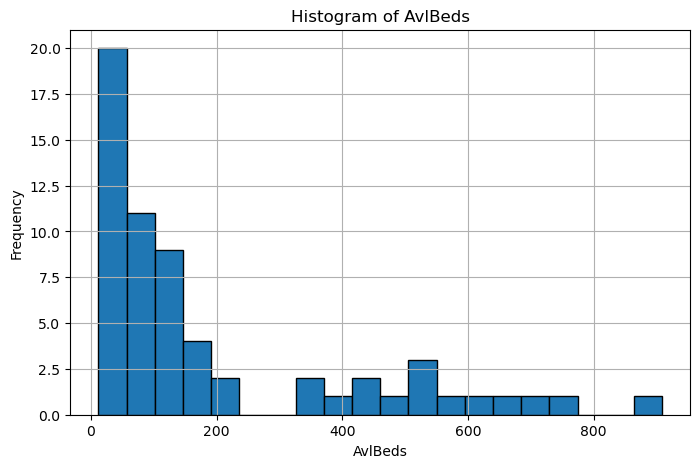

In [16]:
hist_vars = ["NoFTE", "NetPatRev", "InOperExp", "OutOperExp", "OperRev", "OperInc", "AvlBeds"]
for var in hist_vars:
    plt.figure(figsize=(8,5))
    plt.hist(merge_df[var].dropna(), bins=20, edgecolor="black")
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

#### Scatterplots

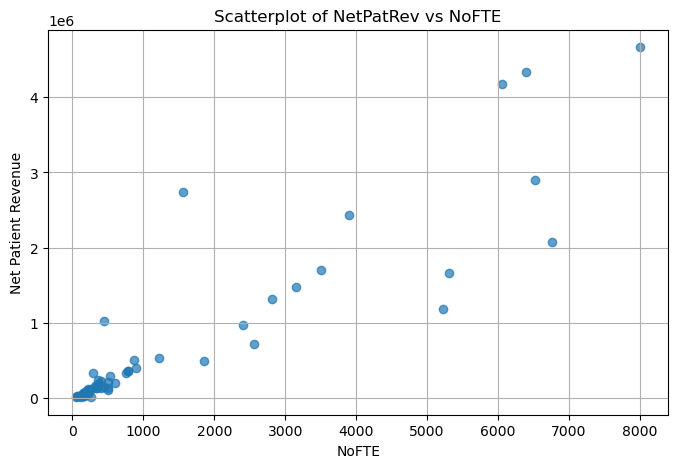

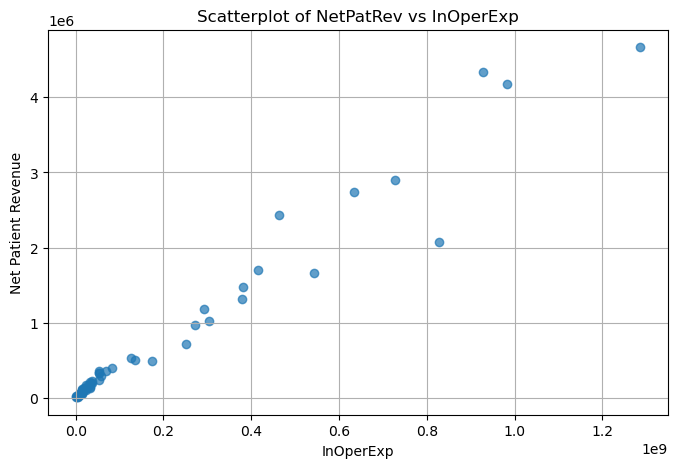

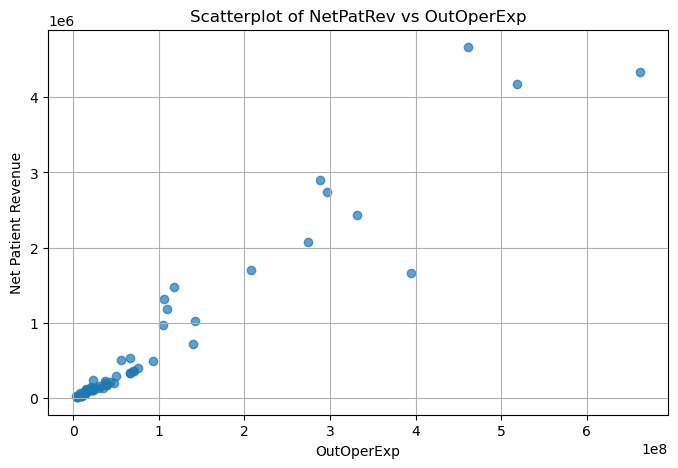

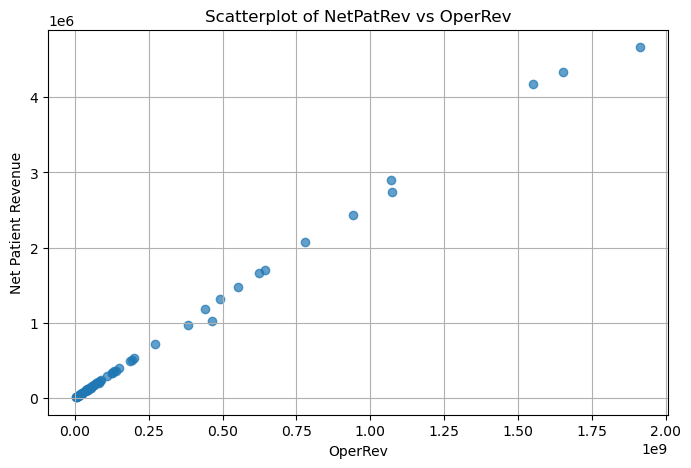

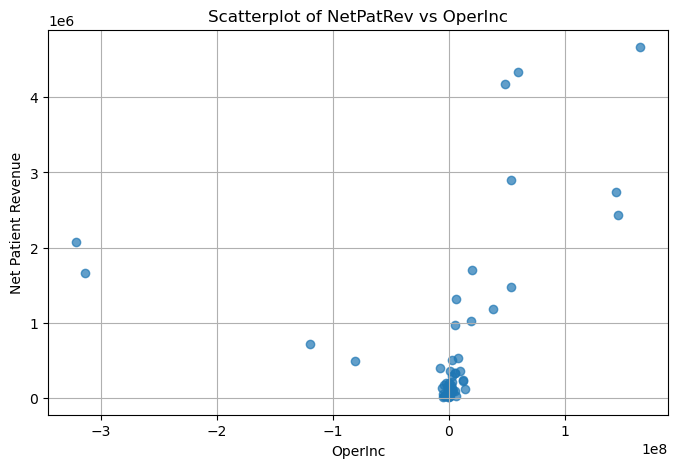

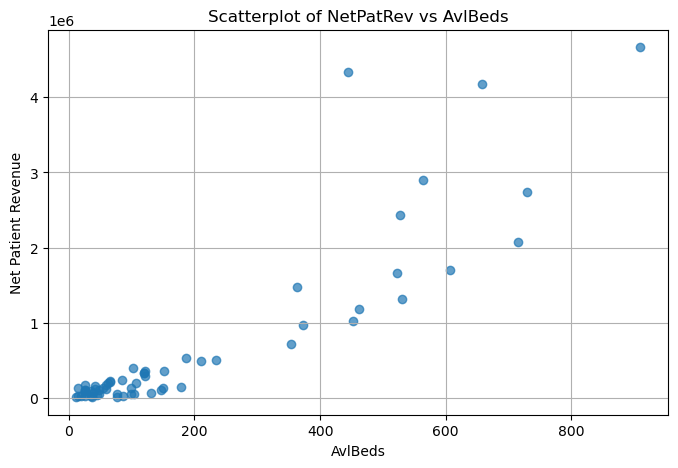

In [18]:
predictors = ["NoFTE", "InOperExp", "OutOperExp", "OperRev", "OperInc", "AvlBeds"]
for predictor in predictors:
    plt.figure(figsize=(8,5))
    plt.scatter(merge_df[predictor], merge_df["NetPatRev"], alpha=0.7)
    plt.title(f"Scatterplot of NetPatRev vs {predictor}")
    plt.xlabel(predictor)
    plt.ylabel("Net Patient Revenue")
    plt.grid(True)
    plt.show()

#### Commentary on Linearity

The first plot, NetPatRev vs. NoFTE, has a general positive relationship with some variation as NoFTE increases. For smaller values of NoFTE, there is a higher correlation between the two variables. 
The second plot, NetPatRev vs. InOperExp, has a similar positive relationship with slightly less variation as InOperExp increases.
The third plot, NetPatRev vs. OutOperExp, has a positive relationship with some variation as the two variables increase. Generally speaking, as OutOperExp increases so will NetPatRev.
The fourth plot, NetPatRev vs. OperRev has an obvious linear relationship which makes sense given the definition of each variable.
The fifth plot, NetPatRev vs. OperInc has a relationship with no obvious correlation. In my opinion it would not be categorized as noise but it is quite close to random.
The sixth and final plot, NatPatRev vs. AvlBeds has a non-lineaer relationship. Visually there is some degree of an exponential relationship between the two variables.


#### Boxplots

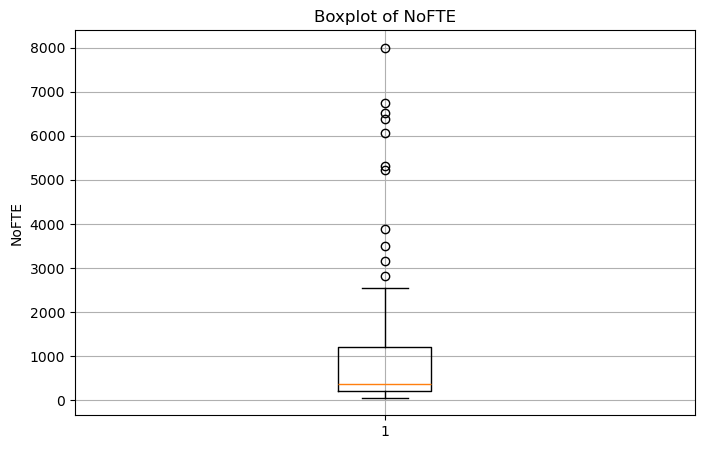

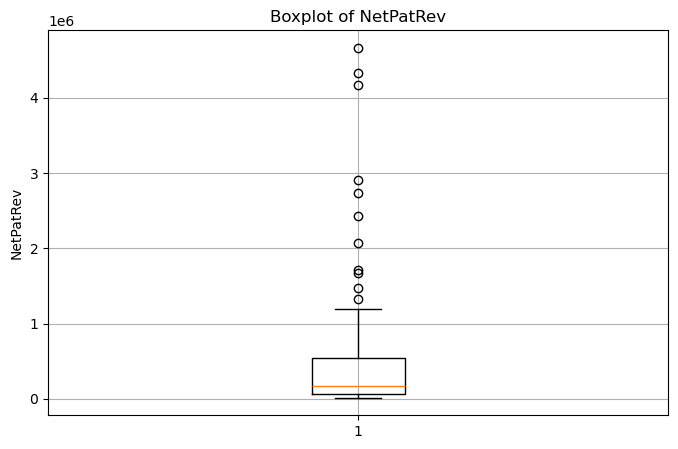

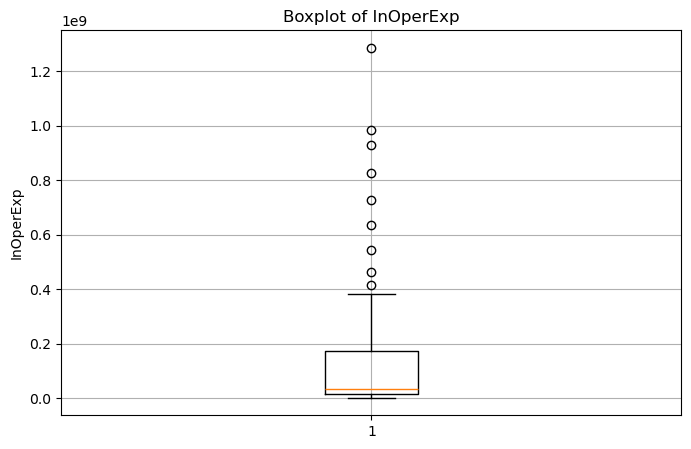

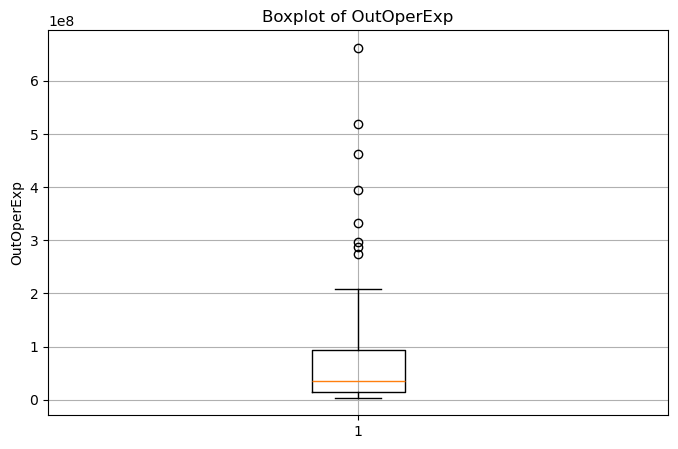

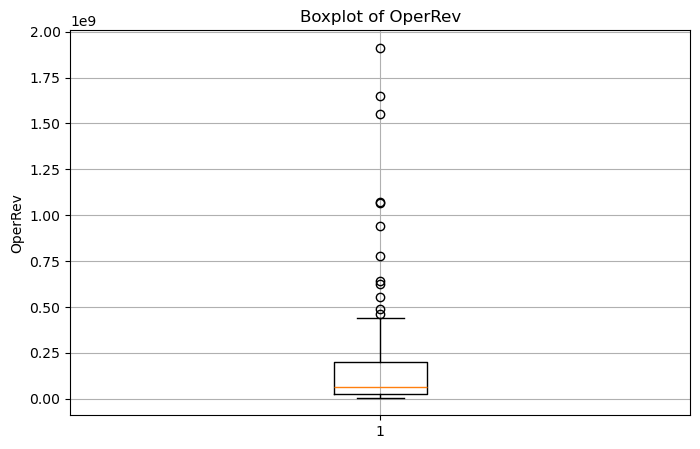

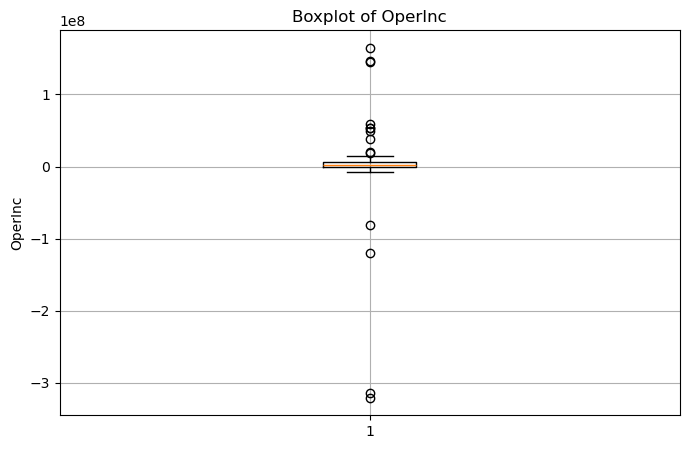

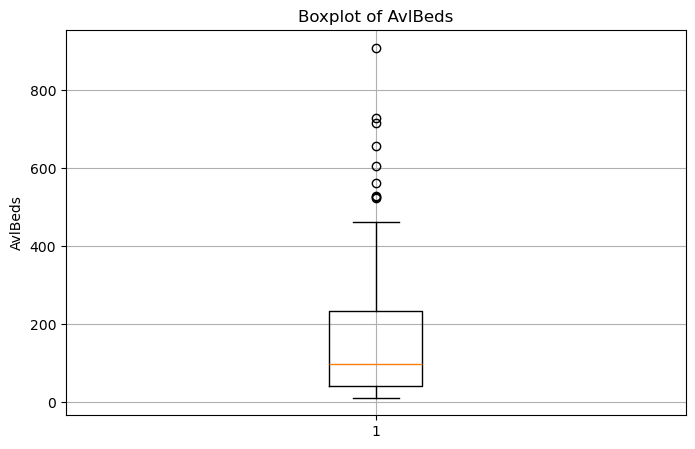

In [20]:
for var in hist_vars:
    plt.figure(figsize=(8,5))
    plt.boxplot(merge_df[var].dropna())
    plt.title(f"Boxplot of {var}")
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

#### QQ Plots and Shapiro-Wilk Tests

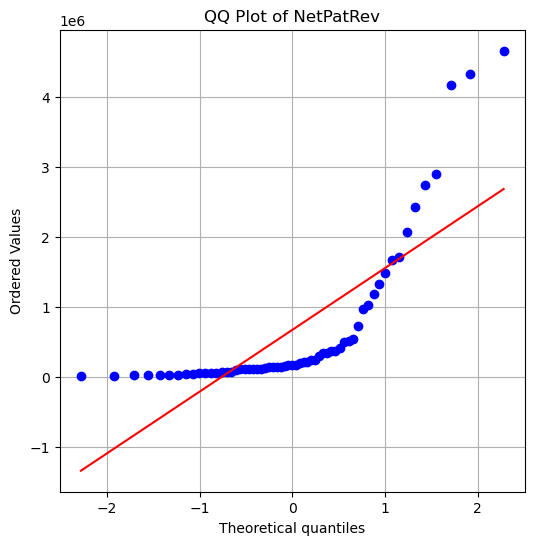


Shapiro-Wilk Test for NetPatRev:
Statistic=0.6234, p-value=0.0000
NetPatRev does NOT look normally distributed (reject H0).


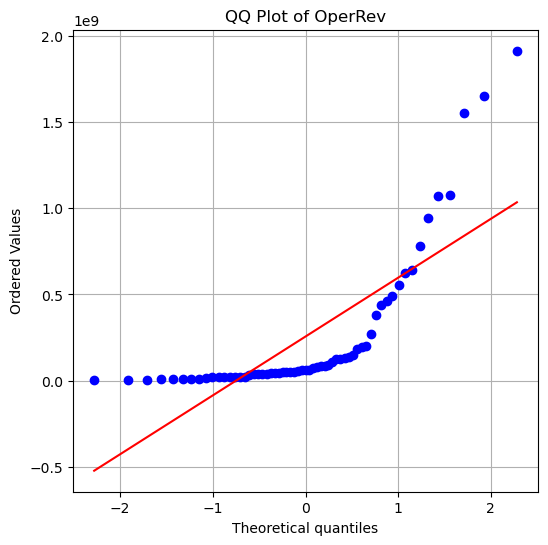


Shapiro-Wilk Test for OperRev:
Statistic=0.6212, p-value=0.0000
OperRev does NOT look normally distributed (reject H0).


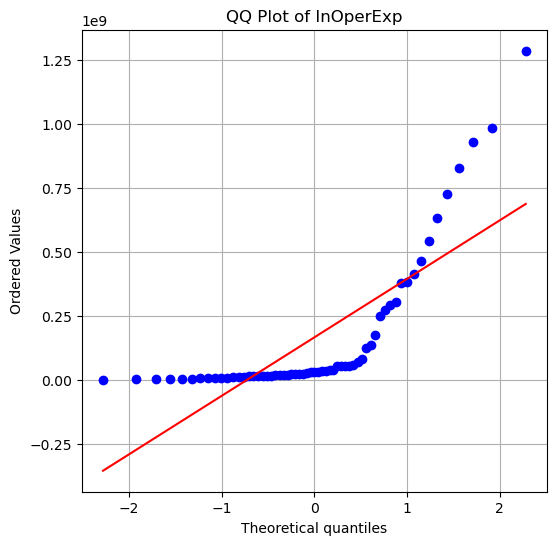


Shapiro-Wilk Test for InOperExp:
Statistic=0.6295, p-value=0.0000
InOperExp does NOT look normally distributed (reject H0).


In [23]:
qq_vars = ["NetPatRev", "OperRev", "InOperExp"]

for var in qq_vars:
    plt.figure(figsize=(6,6))
    sts.probplot(merge_df[var].dropna(), dist="norm", plot=plt)
    plt.title(f"QQ Plot of {var}")
    plt.grid(True)
    plt.show()

    stat, p = shapiro(merge_df[var].dropna())
    print(f"\nShapiro-Wilk Test for {var}:")
    print(f"Statistic={stat:.4f}, p-value={p:.4f}")
    if p > 0.05:
        print(f"{var} looks normally distributed (fail to reject H0).")
    else:
        print(f"{var} does NOT look normally distributed (reject H0).")

#### Commentary on QQ Plots
It may be due to the variables that I chose, but the results from the Shapiro-Wilk test quite obviously line up with the QQ plots. I know at some degree of closeness, these two could differ; but these variables do not look to be normally distributed by either the QQ plots or tests.